In [1]:
from eda_imports import *
from adjustText import adjust_text

In [2]:
df_kleat2 = pd.read_csv('../kleat3_dev/preds_kleat2_whole_transcriptome.csv', sep='\t', header=None,
                 names=['sample_id', 'tree_max_depth', 'precision', 'recall', 'f1'])
df_kleat2['program'] = 'KLEAT2+DT'
df_kleat2.sample_id = df_kleat2.sample_id.replace({
    'UHRR-C1_S1_RNABloom': 'UHRC1',
    'UHRR-C2_S2_RNABloom': 'UHRC2',
    'Brain-C6_S4_RNABloom': 'HBRC6',
    'Brain-C4_S3_RNABloom': 'HBRC4',
})

In [3]:
# df0 = pd.read_csv('../benchmark_transcriptome/after-chimeric-with-ref-hex/bm_output.after-chimeric-with-ref-hex-dist.csv')
# df0['program'] = 'karbor-ref-hex-dist'

In [4]:
# df1 = pd.read_csv('../benchmark_transcriptome/tcga-run-3/benchmark.csv')
# df1['program'] = 'tcga-run-3'

In [5]:
df2 = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark.csv')
df2['program'] = 'KARBOR-DT'

In [6]:
df3 = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark_gradboost.csv')
df3['program'] = 'KARBOR-gradboost'

In [7]:
# df4 = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark_naivebayes.csv')
# df4['program'] = 'tcga-run-4-naviebayes'
# df4['tree_max_depth'] = 0

In [8]:
# default default but varied tree_max_depth a bit
# df2 = pd.read_csv('../output_gradboost.csv')
# df2['program'] = 'karbor-GB'

# # GradientBoostingClassifier(learning_rate=0.05, max_depth=d, n_estimators=200)
# df3 = pd.read_csv('../output_gradboost_v2.csv')
# df3['program'] = 'karbor-GB-v2'

In [9]:
# df4 = pd.read_csv('../benchmark_transcriptome/cluster-first/benchmark.csv')
# df4['program'] = 'cluster-first'

In [10]:
df_cat = pd.concat([df2, df3, df_kleat2], sort=True)

In [11]:
# df_cat = pd.concat([df1, df2, df3, df4, df_kleat2], sort=True)
# df_cat = pd.concat([df0, df1, df2, df3, df_kleat2], sort=True)
# df_cat = pd.concat([df0, df1, df2, df3, df4])
df_cat = df_cat.query('tree_max_depth <= 18')

In [12]:
df_cat.program.value_counts()

KLEAT2+DT           68
KARBOR-DT           40
KARBOR-gradboost    8 
Name: program, dtype: int64

0,1,2,3,

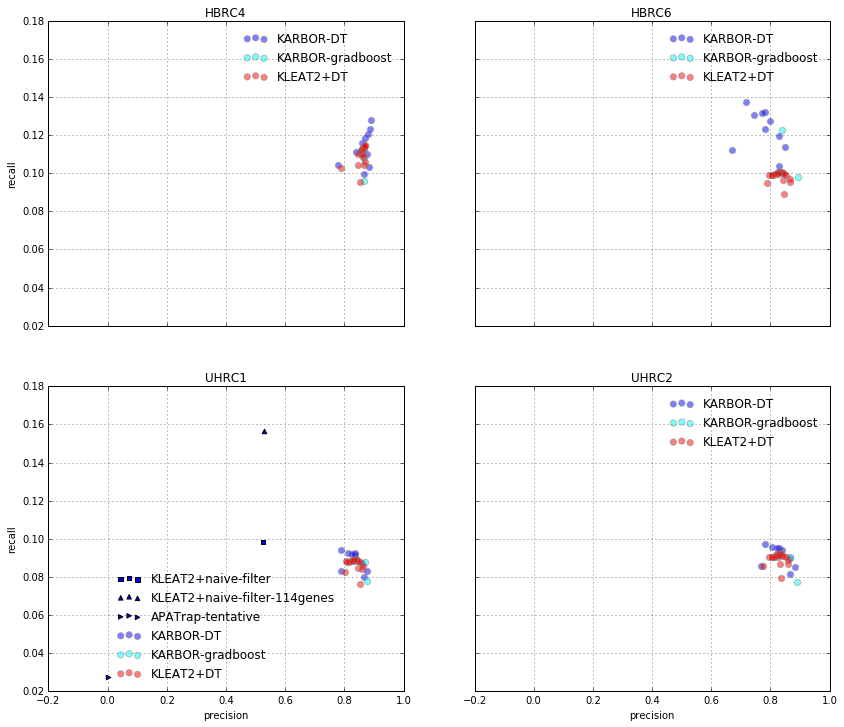

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), 
                         sharex=True, sharey=True
                        )
axes = axes.ravel()


color_dd = dict(zip(df_cat.program.unique(),['blue', 'cyan', 'red', 'yellow', 'black']))

for k, sid in enumerate(['HBRC4', 'HBRC6', 'UHRC1', 'UHRC2']):
    print(k, end=',')
    ax = axes[k]
    
    if sid == "UHRC1":
        ax.scatter([0.5264736297828335], [0.098001848001848], marker='s', label='KLEAT2+naive-filter')
        ax.scatter([0.530055], [0.156704], marker='^', label='KLEAT2+naive-filter-114genes')
        ax.scatter([0.0007928734667226342], [0.027463651050080775], marker='>', label='APATrap-tentative')
 
    
    txts = []
    for kver in df_cat.program.unique():
        _df = df_cat.query(f'program == "{kver}"').query(f'sample_id == "{sid}"')
        if _df.shape[0] > 0:
            color = color_dd[kver]
            _df.plot.scatter('precision', 'recall', marker='o', alpha=0.5,
                             s=40, edgecolor='gray', color=color, ax=ax, label=kver)
        
#         for k, row in _df.iterrows():
#             txt = ax.text(row.precision, row.recall, row.tree_max_depth)
#             txts.append(txt)

    ax.set_title(sid)
    
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.grid()
    
    ax.legend(loc='best', framealpha=0)
    
#     ax.set_xlim(0.55, 0.95)
#     ax.set_ylim(0.02, 0.16)
    
    adjust_text(txts, ax=ax)
    
#     adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
# plt.tight_layout()
# plt.suptitle('ctg hex', y=1.01, fontsize=20)

# UHRC1 only

11

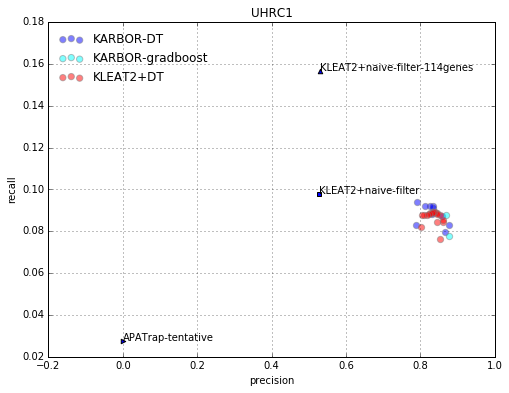

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
ax = axes

color_dd = dict(zip(df_cat.program.unique(),['blue', 'cyan', 'red', 'yellow', 'black']))

sid = 'UHRC1'

k2_nf_prec, k2_nf_recall = [0.5264736297828335, 0.098001848001848]
ax.scatter([k2_nf_prec], [k2_nf_recall], marker='s')
ax.text(k2_nf_prec, k2_nf_recall, 'KLEAT2+naive-filter')

k2_nf_prec_114genes, k2_nf_recall_114genes = [0.530055, 0.156704]
ax.scatter([k2_nf_prec_114genes], [k2_nf_recall_114genes], marker='^')
ax.text(k2_nf_prec_114genes, k2_nf_recall_114genes, 'KLEAT2+naive-filter-114genes')

apatrap_prec, apatrap_recall = [0.0007928734667226342, 0.027463651050080775]
ax.scatter([apatrap_prec], [apatrap_recall], marker='>')
ax.text(apatrap_prec, apatrap_recall, 'APATrap-tentative')

txts = []
for kver in df_cat.program.unique():
    _df = df_cat.query(f'program == "{kver}"').query(f'sample_id == "{sid}"')
    if _df.shape[0] > 0:
        color = color_dd[kver]
        _df.plot.scatter('precision', 'recall', marker='o', alpha=0.5,
                         s=40, edgecolor='gray', color=color, ax=ax, label=kver)

#         for k, row in _df.iterrows():
#             txt = ax.text(row.precision, row.recall, row.tree_max_depth)
#             txts.append(txt)

ax.set_title(sid)

ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.grid()

ax.legend(loc='upper left', framealpha=0)

#     ax.set_xlim(0.55, 0.95)
#     ax.set_ylim(0.02, 0.16)

adjust_text(txts, ax=ax)

#     adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
# plt.tight_layout()
# plt.suptitle('ctg hex', y=1.01, fontsize=20)